In [14]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [15]:


class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride):
        super().__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, 
                      out_channels=out_channels, 
                      kernel_size=4, 
                      stride=stride,
                      padding=1,
                      bias="False",
                      padding_mode="reflect"),
            nn.BatchNorm2d(out_channels),
            nn.LeakyReLU(0.2),
        )


    def forward(self, x):
        return self.conv(x)

ConvBlock(5,10,1)

ConvBlock(
  (conv): Sequential(
    (0): Conv2d(5, 10, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
  )
)

In [16]:
class Discriminator(nn.Module):
    def __init__(self, in_channels=3, features = [64, 128, 256, 512]):
        super().__init__()

        self.initial = nn.Sequential(
            nn.Conv2d(
                in_channels=in_channels, 
                out_channels=features[0], 
                kernel_size=4, 
                stride=2,
                padding=1,
                padding_mode="reflect",
            ),
            nn.LeakyReLU(0.2),
        )

        layers = []
        in_c = features[0]
        for feature in features[1:]:
            layers.append(ConvBlock(in_c, feature, stride= 1 if feature == features[-1] else 2))
            in_c = feature

        layers.append(
            nn.Conv2d(
                in_c, 1, kernel_size=4, stride=1, padding=1, padding_mode="reflect"
            )
        )

        # layers.append(nn.AdaptiveAvgPool2d((30, 30)))
        self.all = nn.Sequential(*layers)
    
    def forward(self, x):
        X = self.initial(x)
        print(X.shape)
        return self.all(X)
        

In [12]:
x = torch.rand(1, 3, 256, 256)

d = Discriminator(in_channels=3)
output = d(x)
print(output.shape)

torch.Size([1, 64, 128, 128])
torch.Size([1, 1, 30, 30])


(-0.5, 29.5, 29.5, -0.5)

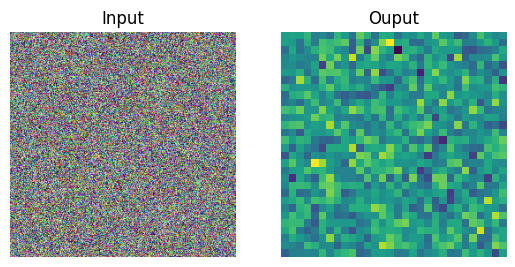

In [21]:
plt.subplot(1,2,1)
plt.imshow(x[0].permute(1,2,0).cpu().numpy())
plt.title("Input")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(output[0].permute(1,2,0).cpu().detach().numpy())
plt.title("Ouput")
plt.axis("off")